## XOR problem Practice

In [ ]:
import torch

![image.png](attachment:image.png)

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
DEVICE

device(type='cuda')

In [ ]:
X = torch.FloatTensor([[0, 0], 
                       [0, 1], 
                       [1, 0], 
                       [1, 1]]).to(DEVICE)
Y = torch.FloatTensor([[0], 
                       [1], 
                       [1], 
                       [0]]).to(DEVICE) 

인공신경망에서는 input layer와 hidden layer, outputlayer로 전달 됩니다. 
각 층에 존재하는 한 단위의 인공뉴런을 node라고 부릅니다.
매개변수인 가중치(weight)에 행렬곱을 하고, bias를 더해줍니다. 가중치는 입력 신호가 출력에 주는 영향을 계산하는 매개변수이고, 편향은 각 노드가 얼마나 데이터에 민감한지를 알려주는 매개변수 입니다.
이 행렬곱의 결과는 활성화 함수(activation fuction)을 거쳐 인공뉴련의 결과값을 산출하게 됩니다. 활성화 함수는 입력에 적절한 처리를 해서 출력 신호로 변환하는 함수 입니다. 활성화 함수는 입력 신호의 합이 활성화를 일으키는지 아닌지를 정하는 역할을 합니다. hiddenlayer를 이 과정을 반복합니다.
우리는 인공신경망의 outputlayer의 결과값과 정답을 비교해 오차를 계산해야 합니다. 이 오차를 기반으로 신경망 전체를 학습시키려면 출력층의 가중치부터 입력층의 가중치까지 모두 gradient decent method를 활용해 변경해줘야 합니다. 이 작업을 최적화하는 알고리즘이 그 유명한 역전파 backpropagation 알고리즘입니다.

이제 1개의 뉴런을 가지는 단층 퍼셉트론을 구현해봅시다. 단층 퍼셉트론이 처음 소개되었을 때는 계단 함수였지만, 우리는 이미 또 다른 활성화 함수인 시그모이드 함수를 알고 있으므로 시그모이드 함수를 사용해보겠습니다.


In [ ]:
class NeuralNet(torch.nn.Module):
        def __init__(self, input_size):
            super(NeuralNet, self).__init__()
            self.input_size = input_size

            self.linear = torch.nn.Linear(self.input_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
            
        def forward(self, input_tensor):
            linear = self.linear(input_tensor)
            output = self.sigmoid(linear)
            return output

model = NeuralNet(2).to(DEVICE)
# y = model(x)
# model = torch.nn.Sequential(
#     torch.nn.Linear(2, 1, bias=True),
#     torch.nn.Sigmoid()).to(DEVICE)

# linear = torch.nn.Linear(2, 1, bias=True)
# sigmoid = torch.nn.Sigmoid()
# model = torch.nn.Sequential(linear, sigmoid).to(DEVICE)

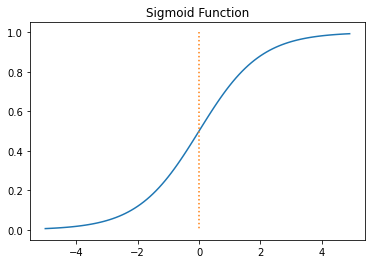

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
# plt.axhline(y=0.5, color='r', linewidth=1)
plt.title('Sigmoid Function')
plt.show()

0 또는 1을 예측하는 이진 분류 문제이므로 비용 함수로는 크로스엔트로피 함수를 사용합니다.
nn.BCELoss()는 이진 분류에서 사용하는 크로스엔트로피 함수입니다.

또 학습을 해야죠, 저희가 배운 gradient descent 를 사용할 겁니다.

이 경사하강법을 최적화 하는 방법 중에 확률적 경사하강법인 stochastic GD를 쓸 예정입니다.

In [ ]:
criterion = torch.nn.BCELoss().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=1.0)

zero_grad()를 호출해 경사값을 0으로 설정합니다.
우리의 가설은 모델이 X를 처리한 결과값과 Y라는 정답 사이의 거리를 cost로 설정하는 것입니다.
cost를 역전파시킵니다.
optimizer는 step()함수를 부를 때마다 가중치를 학습률 만큼 갱신합니다. lr = 1.0

In [ ]:
for step in range(10001): 
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.7862168550491333
100 0.693147599697113
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200 

In [ ]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()  # True or False -> 1 or 0 -> 1., 0.
    accuracy = (predicted == Y).float().mean()  # [True, False, True, True, ...]
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


# Practice
### 위 코드에서 hidden layer를 추가하여 XOR문제를 해결해 봅시다.

In [ ]:
class myNeuralNet(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(myNeuralNet, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size

        def forward(self, input_tensor):

            return 

new_model = myNeuralNet(2, 2).to(DEVICE)

In [ ]:
criterion = torch.nn.BCELoss().to(DEVICE)
optimizer = torch.optim.SGD(new_model.parameters(), lr=0.1)

In [ ]:
for step in range(10001): 
    optimizer.zero_grad()
    hypothesis = new_model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.7412569522857666
100 0.6058236956596375
200 0.4745993912220001
300 0.30212706327438354
400 0.17843183875083923
500 0.11505025625228882
600 0.08133530616760254
700 0.06053301692008972
800 0.048023756593465805
900 0.03942285478115082
1000 0.0330943763256073
1100 0.028442030772566795
1200 0.024810664355754852
1300 0.022037915885448456
1400 0.01972654089331627
1500 0.017862871289253235
1600 0.01625928469002247
1700 0.014928850345313549
1800 0.013803382404148579
1900 0.0128311887383461
2000 0.011953383684158325
2100 0.011200165376067162
2200 0.010524453595280647
2300 0.009935334324836731
2400 0.009393351152539253
2500 0.008913801051676273
2600 0.008467797189950943
2700 0.008065761998295784
2800 0.007701499853283167
2900 0.00736992945894599
3000 0.007063837721943855
3100 0.006775046233087778
3200 0.006513453554362059
3300 0.006266157142817974
3400 0.006037625949829817
3500 0.00583050400018692
3600 0.005631214939057827
3700 0.00544517207890749
3800 0.005273609422147274
3900 0.005102079361

In [ ]:
with torch.no_grad():
    hypothesis = new_model(X)
    predicted = (hypothesis > 0.5).float()  # True or False -> 1 or 0 -> 1., 0.
    accuracy = (predicted == Y).float().mean()  # [True, False, True, True, ...]
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[6.1002315e-04]
 [9.9719632e-01]
 [9.9719632e-01]
 [6.0890609e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0
